**Workshop Queimadas**

In [ ]:
!pip install spectral

     |████████████████████████████████| 212 kB 8.5 MB/s 


In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tif
from spectral import imshow
from matplotlib import colors

In [ ]:
# Leitura das imagens
prefire = tif.imread('/content/drive/MyDrive/Live PDI Python/LT05_L2SP_221071_20100907_prefire_02_T1_SR_sr_c_w.tif')
postfire = tif.imread('/content/drive/MyDrive/Live PDI Python/LT05_L2SP_221071_20100923_postfire_02_T1_SR_sr_c_w.tif')
regrowth = tif.imread('/content/drive/MyDrive/Live PDI Python/LT05_L2SP_221071_20110910_regrowth_02_T1_SR_sr_c_w.tif')

ImageView object:
  Display bands       :  (1, 3, 5)
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.051350001245737076, 0.16005750000476837]
    G: [0.035179998725652695, 0.30831000208854675]
    B: [0.020604999735951424, 0.3016825020313263]

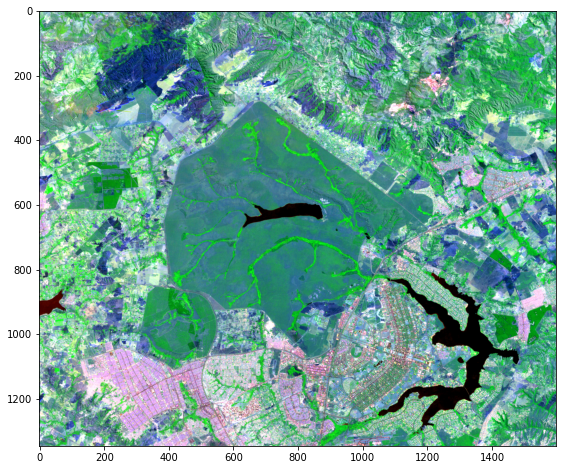

In [ ]:
imshow(prefire, (1,3,5), stretch=(0.02) )

In [ ]:
# Cálculo dos NBR
NBR_pre = ((prefire[:,:,3] - prefire[:,:,-1]) / (prefire[:,:,3] + prefire[:,:,-1])) * 1000
NBR_pos = ((postfire[:,:,3] - postfire[:,:,-1]) / (postfire[:,:,3] + postfire[:,:,-1])) * 1000
NBR_reg = ((regrowth[:,:,3] - regrowth[:,:,-1]) / (regrowth[:,:,3] + regrowth[:,:,-1])) * 1000

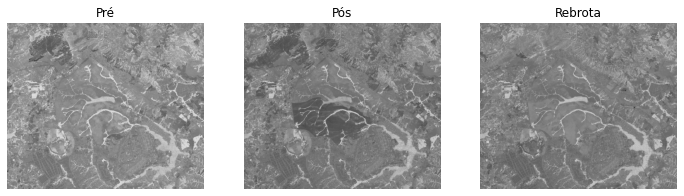

In [ ]:
# Visualização do resultado
fig, ax = plt.subplots(1,3)
ax[0].imshow(NBR_pre, cmap='Greys_r')
ax[0].set_title('Pré')
ax[0].axis('off')
ax[1].imshow(NBR_pos, cmap='Greys_r')
ax[1].set_title('Pós')
ax[1].axis('off')
ax[2].imshow(NBR_reg, cmap='Greys_r')
ax[2].set_title('Rebrota')
ax[2].axis('off')
fig.show()

In [ ]:
# Cálculo dos NBR
NBR_pre = ((prefire[:,:,3] - prefire[:,:,-1]) / (prefire[:,:,3] + prefire[:,:,-1])) * 1000
NBR_pos = ((postfire[:,:,3] - postfire[:,:,-1]) / (postfire[:,:,3] + postfire[:,:,-1])) * 1000
NBR_reg = ((regrowth[:,:,3] - regrowth[:,:,-1]) / (regrowth[:,:,3] + regrowth[:,:,-1])) * 1000

In [ ]:
# Cálculo dos delta-NBR
dNBR = (NBR_pre - NBR_pos)

RdNBR = (NBR_pre - NBR_pos) / np.sqrt(abs(NBR_pre / 1000))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
# Visualização 
plt.imshow(RdNBR, cmap='Greys_r')

In [ ]:
# Substituindo valores
from numpy import inf
RdNBR[RdNBR == -inf] = 0
RdNBR[RdNBR == inf] = 0

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-454.5804443359375, 1428.799560546875]
    G: [-454.5804443359375, 1428.799560546875]
    B: [-454.5804443359375, 1428.799560546875]

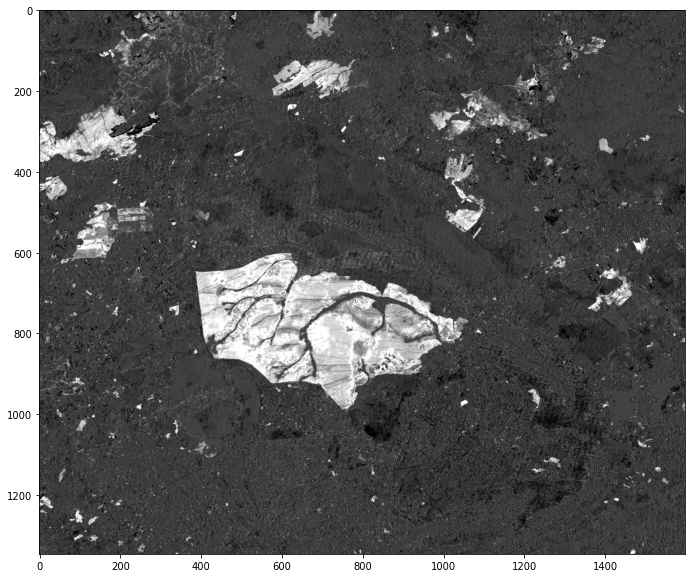

In [ ]:
# Visualização
imshow(RdNBR, stretch=(0.02))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-454.5804443359375, 1428.799560546875]
    G: [-454.5804443359375, 1428.799560546875]
    B: [-454.5804443359375, 1428.799560546875]

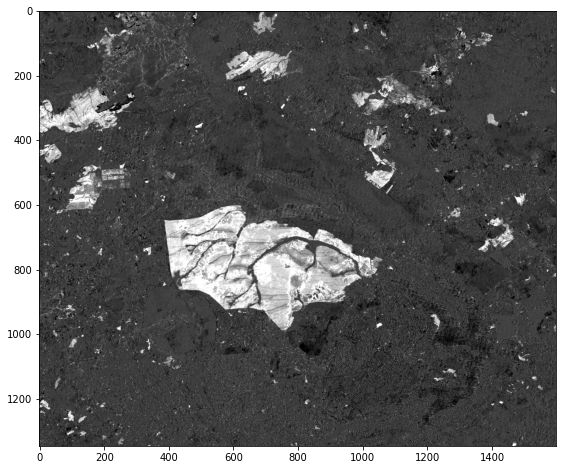

In [ ]:
imshow(RdNBR, stretch=(0.02))

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-454.5804443359375, 1428.799560546875]
    G: [-454.5804443359375, 1428.799560546875]
    B: [-454.5804443359375, 1428.799560546875]

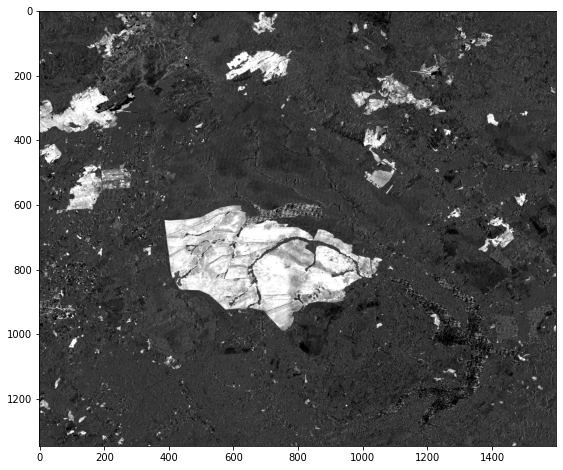

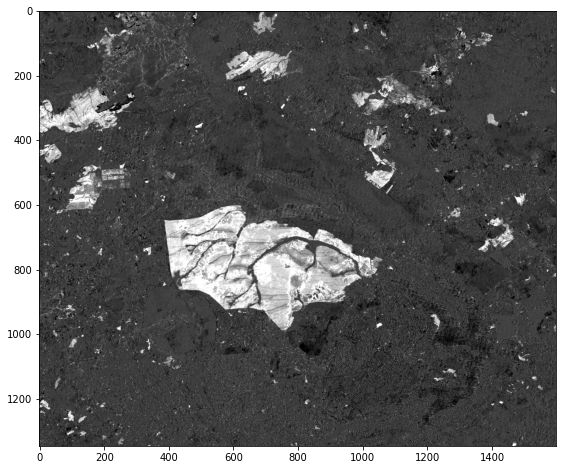

In [ ]:
# Visualização
imshow(dNBR, stretch=(0.02))
imshow(RdNBR, stretch=(0.02))

In [ ]:
# Cálculo dos delta-NBR rebrota
dNBR_reg = (NBR_pos - NBR_reg)

RdNBR_reg = (NBR_pos - NBR_reg) / np.sqrt(abs(NBR_pos / 1000))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-1244.565673828125, 803.6647338867188]
    G: [-1244.565673828125, 803.6647338867188]
    B: [-1244.565673828125, 803.6647338867188]

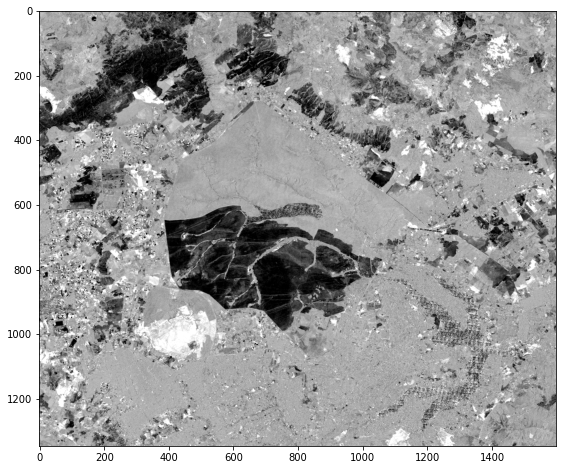

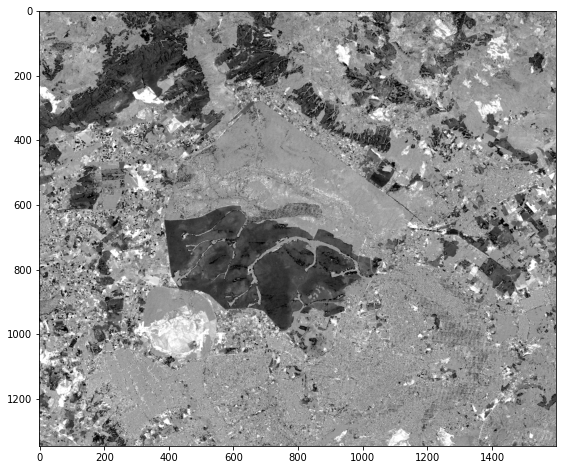

In [ ]:
# Visualização
imshow(dNBR_reg, stretch=(0.02))
imshow(RdNBR_reg, stretch=(0.02))

In [ ]:
r = RdNBR_reg.copy()

In [ ]:

r[r == -inf] = 0
r[r == inf] = 0

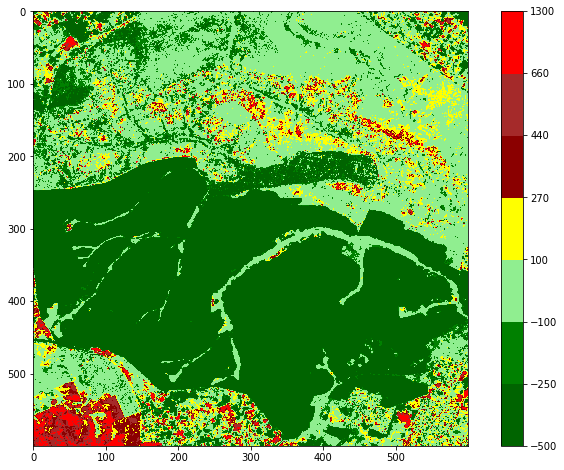

In [ ]:

cmap = colors.ListedColormap(['darkgreen','green','lightgreen','yellow', 'darkred','brown','red'])

bounds=[-500,-250,-100,100,270,440,660,1300]

norm = colors.BoundaryNorm(bounds, cmap.N)

im = plt.imshow(r[400:1000, 400:1000],cmap=cmap, norm=norm)
plt.colorbar(im)

In [ ]:
r.shape

(1346, 1599)

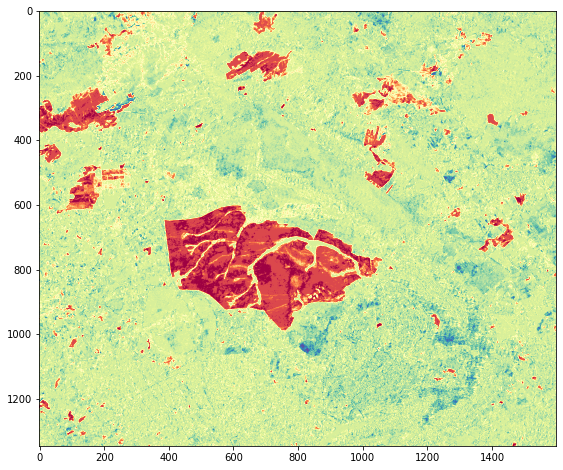

In [ ]:
plt.imshow(F, cmap='Spectral_r')